In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style="darkgrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## EDA - IPL MATCHES

In [3]:
df_match = pd.read_csv('matches.csv')
df_match.head(3)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   
2   3    2017     Rajkot  2017-04-07        Gujarat Lions   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   
2  normal           0   Kolkata Knight Riders            0              10   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   

     umpire2 umpire3  
0   NJ Llong     NaN  
1     S Ravi     NaN  
2  CK Nandan     NaN

In [4]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
print(df_match.isnull().sum())

# df_match[df_match['result'] == 'no result']
# matches where there is no result have winner & player_of_match column as null (4 rows)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


## How many matches were played and where?

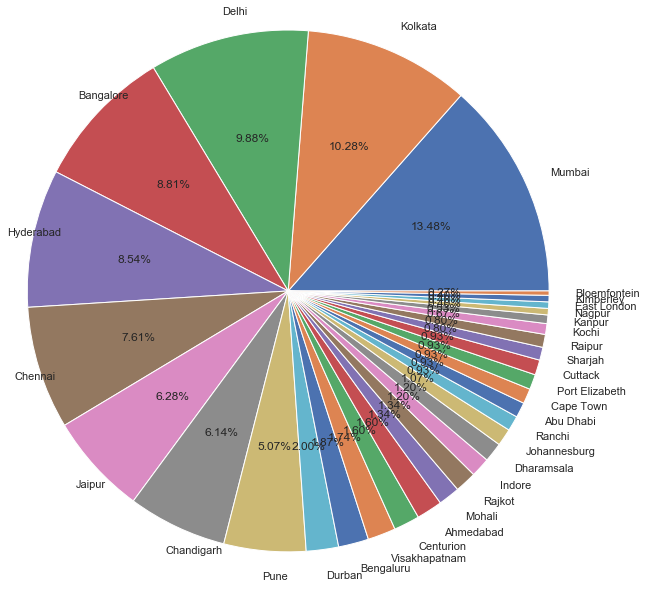

In [6]:
# CITY DISTRIBUTION OF MATCHES

plt.figure(figsize=(16,8))
city_count = df_match['city'].value_counts()
plt.pie(city_count, autopct='%.2f%%', radius=1.5, labels=city_count.index, rotatelabels=False, center = (10,0))
plt.show()

# Mumbai has hosted the maximum no. of matches in all seasons (13.48 %)
# Mumbai, Kolkata, Delhi, Bangalore & Hyderabad hosted more than 50% of the matches.

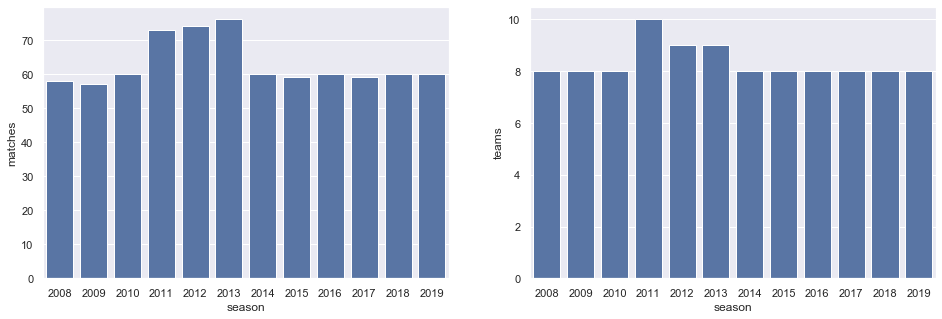

In [7]:
# NO. OF MATCHES PLAYED IN EACH SEASON & NO OF TEAMS PLAYED IN EACH SEASON

team_count = pd.DataFrame(columns=['season','matches','teams'])

fig, axes = plt.subplots(1,2, figsize=(16,5))

ind=0
for year in df_match['season'].unique():    
    matches_by_year = df_match[df_match['season'] == year]
    count_matches = len(matches_by_year)
    count_teams = len(set(matches_by_year['team1'].unique() + matches_by_year['team2'].unique()))
    team_count.loc[ind] = [year,count_matches,count_teams]
    ind=ind+1

team_count.sort_values(by='season', inplace=True)
sns.barplot(data=team_count, x='season', y='matches', ax=axes.flat[0], color='b')
sns.barplot(data=team_count, x='season', y='teams', ax=axes.flat[1], color='b')
plt.show()

# Maximum no of matches were played in 2011, 2012 & 2013
# Maximum no. of teams also played in 2011, 2012 & 2013 which had maximum no of matches

In [8]:
# LIST OF TEAMS PLAYED IN EACH SEASON

# 'Rising Pune Supergiant' and 'Rising Pune Supergiants' refer to the same team, we replace it by one label

df_match.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)

team_list = list(set(df_match.team1.unique())  & set(df_match.team2.unique()))
team_list

['Delhi Capitals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Gujarat Lions',
 'Delhi Daredevils',
 'Rising Pune Supergiants',
 'Pune Warriors',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Royal Challengers Bangalore']

## Number of matches played, won & lost

In [9]:
# DATA FRAME SHOWING MATCHES PLAYED, WON & LOST BY EACH TEAM ACROSS ALL SEASONS

match_count = pd.DataFrame(columns = ['played','won','lost'])
for team in team_list:
    match_count.loc[team,'played'] = df_match[(df_match.team1 == team) | (df_match.team2 == team)]['id'].count()
    match_count.loc[team,'won'] = df_match[df_match.winner == team]['id'].count()
    match_count.loc[team, 'lost'] = df_match[((df_match.team1 == team) | (df_match.team2 == team)) & (df_match.winner != team)]['id'].count()
    
match_count.loc['total',:] = match_count.sum(axis=0)
match_count['percent_won'] = (match_count['won'] / match_count['played']*100).apply(round)
match_count['percent_lost'] = (match_count['lost'] / match_count['played']*100).apply(round)
match_count = match_count.reset_index()
match_count.rename(columns={'index':'team'}, inplace=True)
match_count

team played  won lost  percent_won  percent_lost
0                Delhi Capitals     16   10    6         62.0          38.0
1               Deccan Chargers     75   29   46         39.0          61.0
2          Kochi Tuskers Kerala     14    6    8         43.0          57.0
3         Kolkata Knight Riders    178   92   86         52.0          48.0
4                 Gujarat Lions     30   13   17         43.0          57.0
5              Delhi Daredevils    161   67   94         42.0          58.0
6       Rising Pune Supergiants     30   15   15         50.0          50.0
7                 Pune Warriors     46   12   34         26.0          74.0
8               Kings XI Punjab    176   82   94         47.0          53.0
9              Rajasthan Royals    147   75   72         51.0          49.0
10               Mumbai Indians    187  109   78         58.0          42.0
11          Chennai Super Kings    164  100   64         61.0          39.0
12          Sunrisers Hyderabad    108   58   50         54.0          46.0
13  Royal Challengers Bangalore    180   84   96         47.0          53.0
14                        total   1512  752  760         50.0          50.0

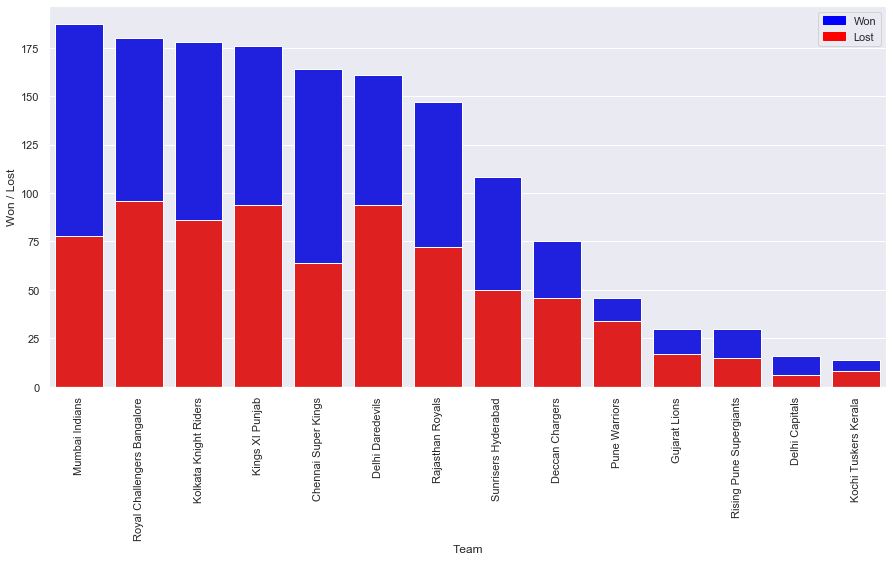

In [10]:
plt.figure(figsize=(15,7))

match_count = match_count.sort_values(by='played', ascending=False)
bar1 = sns.barplot(data = match_count.iloc[1:,:], x = 'team', y = 'played', color='blue')
bar2 = sns.barplot(data = match_count.iloc[1:,:], x = 'team', y = 'lost', color='red')

top_bar = mpatches.Patch(color='blue', label='Won')
bottom_bar = mpatches.Patch(color='red', label='Lost')
plt.legend(handles=[top_bar, bottom_bar])

plt.xticks(rotation=90)
plt.ylabel('Won / Lost')
plt.xlabel('Team')
plt.show()

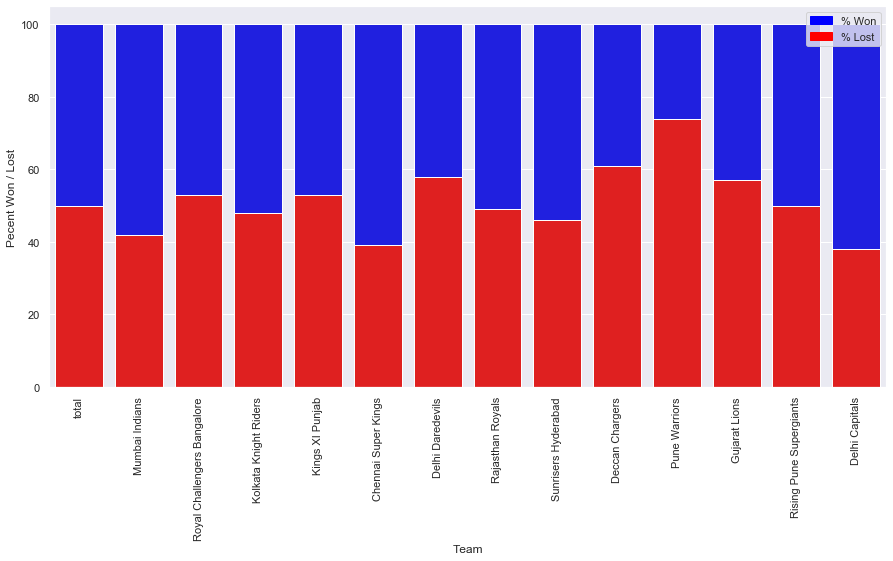

In [11]:
plt.figure(figsize=(15,7))

bar1 = sns.barplot(data = match_count.reset_index().iloc[:-1,:], x = 'team', y = [100]*14, color='blue')
bar2 = sns.barplot(data = match_count.reset_index().iloc[:-1,:], x = 'team', y = 'percent_lost', color='red')

top_bar = mpatches.Patch(color='blue', label='% Won')
bottom_bar = mpatches.Patch(color='red', label='% Lost')
plt.legend(handles=[top_bar, bottom_bar])

plt.xticks(rotation=90)
plt.ylabel('Pecent Won / Lost')
plt.xlabel('Team')
plt.show()

## What was the outcome of matches ?

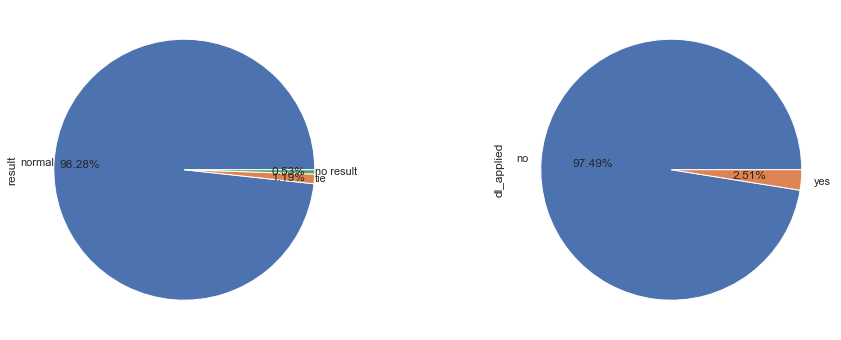

In [12]:
# OUTCOME OF MATCHES AND WHETHER DL WAS APPLIED OR NOT 

fig, axes = plt.subplots(1,2, figsize=(16,6))
df_match['result'].value_counts().plot.pie(ax = axes.flat[0], autopct='%.2f%%', pctdistance = 0.8, labeldistance=1)
df_match['dl_applied'].value_counts().plot.pie(ax = axes.flat[1], labels=['no','yes'], autopct='%.2f%%')
plt.show()

# The result of 98.28% of matches was normal (win/loss by one team) while 1.2% of the matches ended in a tie. Also, 0.53%
# of matches (4) had no result for which the 'winner' column in empty

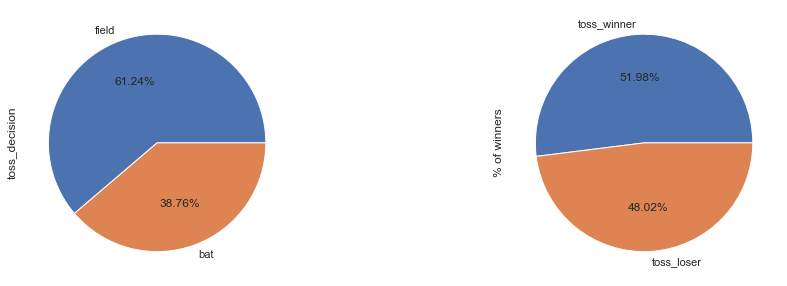

In [13]:
# OUTCOME OF TOSSES & WHAT PERCENT OF TOSS WINNERS WON/LOST THE MATCH ?

fig, axes = plt.subplots(1,2, figsize=(16,5))
df_match['toss_decision'].value_counts().plot.pie(autopct='%.2f%%',  ax=axes.flat[0])

win = df_match[df_match['toss_winner'] == df_match['winner']]['toss_decision'].value_counts()
loss = df_match[df_match['toss_winner'] != df_match['winner']]['toss_decision'].value_counts()

df_toss = pd.concat([win,loss], axis=1)
df_toss.columns = ['toss_winner','toss_loser']

df_toss.sum().plot.pie(autopct='%.2f%%',  ax=axes.flat[1])
axes.flat[1].set_ylabel('% of winners')
plt.show()

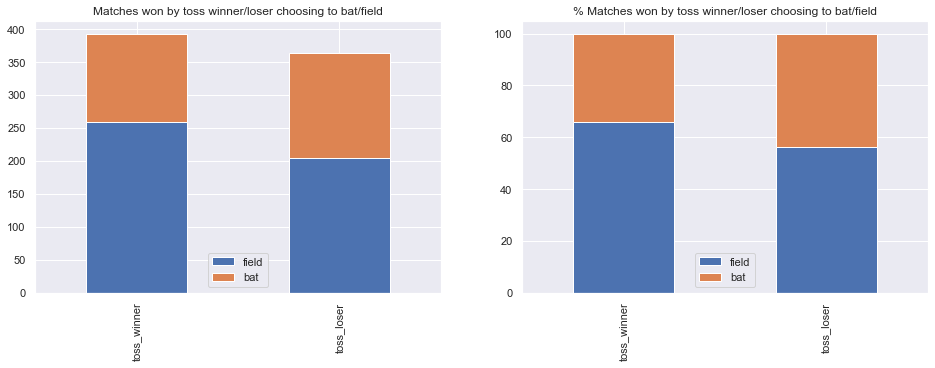

In [14]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
df_toss.T.plot(kind='bar', stacked=True, ax=axes.flat[0])
axes.flat[0].set_title('Matches won by toss winner/loser choosing to bat/field')

df_toss['toss_winner'] = df_toss['toss_winner'] /df_toss.sum()[0] *100
df_toss['toss_loser'] = df_toss['toss_loser'] /df_toss.sum()[1] *100

df_toss.T.plot(kind='bar', stacked=True, ax=axes.flat[1])
axes.flat[1].set_title('% Matches won by toss winner/loser choosing to bat/field')
plt.show()

# The toss winner elected to field 61 % of the time and to bat only 39% of the time
# When the 

## Team performance analysis (2008 - 2019)

In [15]:
# PERFORMANCE OF EACH TEAM FROM 2008 - 2019

team_performance = pd.DataFrame(columns = ['season','team','played','won','lost'])
for team in team_list:
    matches_played_by_team = df_match[(df_match.team1 == team) | (df_match.team2 == team)]
    played_count = matches_played_by_team.groupby('season')['id'].count()
    win_count = matches_played_by_team[matches_played_by_team.winner == team].groupby('season')['id'].count()
    loss_count = matches_played_by_team[matches_played_by_team.winner != team].groupby('season')['id'].count()
    matches_by_year = pd.concat([played_count, win_count, loss_count],1).reset_index()
    matches_by_year.columns = ['season','played','won','lost']
    matches_by_year.insert(0, 'team',team)
    matches_by_year.reset_index(inplace=True, drop=True)
    team_performance = team_performance.append(matches_by_year)
team_performance[['played','won','lost']] = team_performance[['played','won','lost']].astype(float)
team_performance['won_percent'] = team_performance['won'] / team_performance['played']*100
team_performance['won_percent'] = team_performance['won_percent'].round(2)
team_performance

season                         team  played   won  lost  won_percent
0    2019               Delhi Capitals    16.0  10.0   6.0        62.50
0    2008              Deccan Chargers    14.0   2.0  12.0        14.29
1    2009              Deccan Chargers    16.0   9.0   7.0        56.25
2    2010              Deccan Chargers    16.0   8.0   8.0        50.00
3    2011              Deccan Chargers    14.0   6.0   8.0        42.86
4    2012              Deccan Chargers    15.0   4.0  11.0        26.67
0    2011         Kochi Tuskers Kerala    14.0   6.0   8.0        42.86
0    2008        Kolkata Knight Riders    13.0   6.0   7.0        46.15
1    2009        Kolkata Knight Riders    13.0   3.0  10.0        23.08
2    2010        Kolkata Knight Riders    14.0   7.0   7.0        50.00
3    2011        Kolkata Knight Riders    15.0   8.0   7.0        53.33
4    2012        Kolkata Knight Riders    17.0  12.0   5.0        70.59
5    2013        Kolkata Knight Riders    16.0   6.0  10.0        37.50
6    2014        Kolkata Knight Riders    16.0  11.0   5.0        68.75
7    2015        Kolkata Knight Riders    13.0   7.0   6.0        53.85
8    2016        Kolkata Knight Riders    15.0   8.0   7.0        53.33
9    2017        Kolkata Knight Riders    16.0   9.0   7.0        56.25
10   2018        Kolkata Knight Riders    16.0   9.0   7.0        56.25
11   2019        Kolkata Knight Riders    14.0   6.0   8.0        42.86
0    2016                Gujarat Lions    16.0   9.0   7.0        56.25
1    2017                Gujarat Lions    14.0   4.0  10.0        28.57
0    2008             Delhi Daredevils    14.0   7.0   7.0        50.00
1    2009             Delhi Daredevils    15.0  10.0   5.0        66.67
2    2010             Delhi Daredevils    14.0   7.0   7.0        50.00
3    2011             Delhi Daredevils    14.0   4.0  10.0        28.57
4    2012             Delhi Daredevils    18.0  11.0   7.0        61.11
5    2013             Delhi Daredevils    16.0   3.0  13.0        18.75
6    2014             Delhi Daredevils    14.0   2.0  12.0        14.29
7    2015             Delhi Daredevils    14.0   5.0   9.0        35.71
8    2016             Delhi Daredevils    14.0   7.0   7.0        50.00
9    2017             Delhi Daredevils    14.0   6.0   8.0        42.86
10   2018             Delhi Daredevils    14.0   5.0   9.0        35.71
0    2016      Rising Pune Supergiants    14.0   5.0   9.0        35.71
1    2017      Rising Pune Supergiants    16.0  10.0   6.0        62.50
0    2011                Pune Warriors    14.0   4.0  10.0        28.57
1    2012                Pune Warriors    16.0   4.0  12.0        25.00
2    2013                Pune Warriors    16.0   4.0  12.0        25.00
0    2008              Kings XI Punjab    15.0  10.0   5.0        66.67
1    2009              Kings XI Punjab    14.0   7.0   7.0        50.00
2    2010              Kings XI Punjab    14.0   4.0  10.0        28.57
3    2011              Kings XI Punjab    14.0   7.0   7.0        50.00
4    2012              Kings XI Punjab    16.0   8.0   8.0        50.00
5    2013              Kings XI Punjab    16.0   8.0   8.0        50.00
6    2014              Kings XI Punjab    17.0  12.0   5.0        70.59
7    2015              Kings XI Punjab    14.0   3.0  11.0        21.43
8    2016              Kings XI Punjab    14.0   4.0  10.0        28.57
9    2017              Kings XI Punjab    14.0   7.0   7.0        50.00
10   2018              Kings XI Punjab    14.0   6.0   8.0        42.86
11   2019              Kings XI Punjab    14.0   6.0   8.0        42.86
0    2008             Rajasthan Royals    16.0  13.0   3.0        81.25
1    2009             Rajasthan Royals    13.0   6.0   7.0        46.15
2    2010             Rajasthan Royals    14.0   6.0   8.0        42.86
3    2011             Rajasthan Royals    13.0   6.0   7.0        46.15
4    2012             Rajasthan Royals    16.0   7.0   9.0        43.75
5    2013             Rajasthan Royals    1

In [16]:
team_performance.groupby('team')[['season']].count().sort_values(by='season')

# IGNORING THE TEAMS THAT HAVE PLAYED FOR LESS THAN 4 SEASONS OR STOPPED PLAYING SINCE WE DON'T HAVE ENOUGH DATA TO EVALUATE THEM
# GUJARAT LIONS, RISING PUNE SUPERGIANTS, DECCAN CHARGERS, PUNE WARRIORS, KOCHI TUSKERS, DELHI CAPITALS

teams_to_remove = ['Gujarat Lions','Rising Pune Supergiants','Deccan Chargers','Pune Warriors','Kochi Tuskers Kerala','Delhi Capitals']
for team in teams_to_remove:
    team_performance = team_performance[team_performance['team'] != team]
team_performance.groupby('team')[['won_percent']].mean().sort_values(by='won_percent', ascending=False)

won_percent
team                                    
Chennai Super Kings            60.951000
Mumbai Indians                 57.360000
Sunrisers Hyderabad            53.192857
Kolkata Knight Riders          50.995000
Rajasthan Royals               50.365000
Kings XI Punjab                45.962500
Royal Challengers Bangalore    45.875833
Delhi Daredevils               41.242727

['Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Sunrisers Hyderabad' 'Royal Challengers Bangalore']


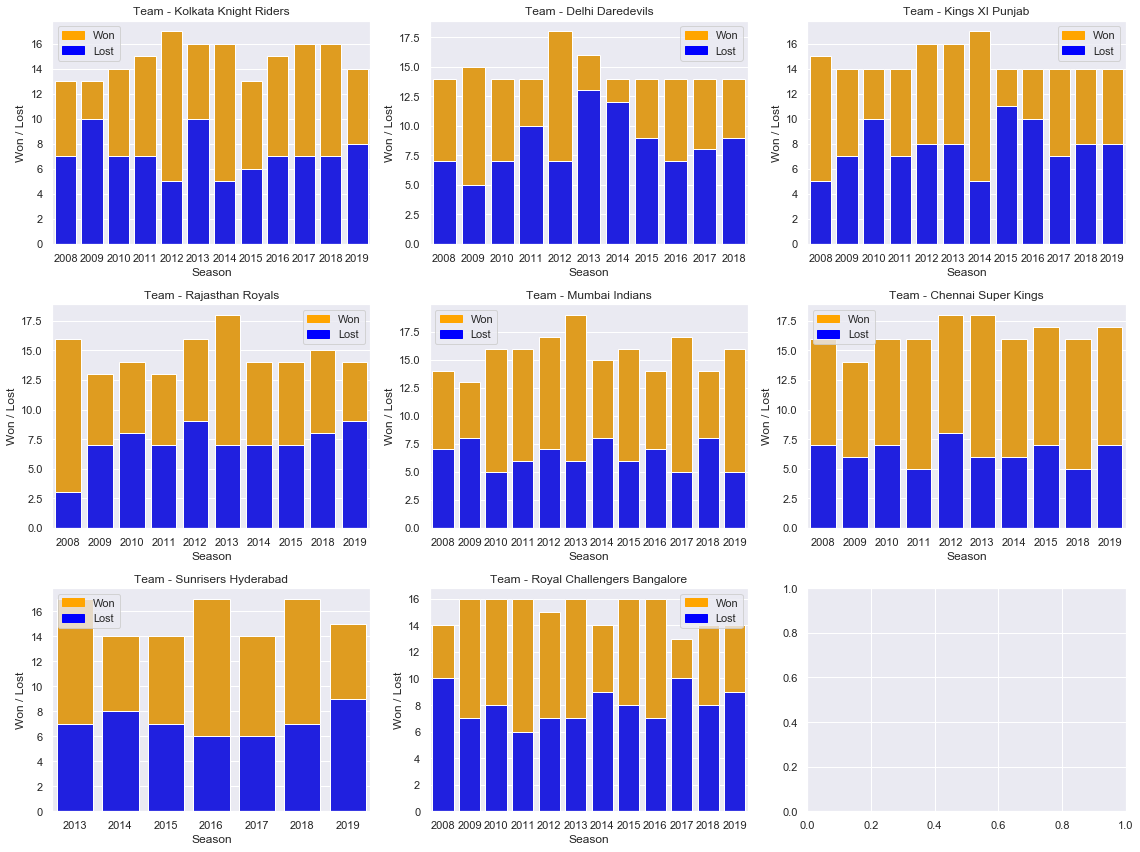

In [17]:
# PLOT BAR PLOTS FOR MATCHES PLAYED & WON BY EACH TEAM FOR EACH SEASON

print(team_performance.team.unique())
fig, axes = plt.subplots(3,3, figsize=(16,12))
i=0
for team in team_performance.team.unique():
    match_count = team_performance[team_performance.team == team]
    bar1 = sns.barplot(data = match_count, x = 'season', y = 'played', color='orange', ax=axes.flat[i])
    bar2 = sns.barplot(data = match_count, x = 'season', y = 'lost', color='blue', ax=axes.flat[i])

    top_bar = mpatches.Patch(color='orange', label='Won')
    bottom_bar = mpatches.Patch(color='blue', label='Lost')
    axes.flat[i].legend(handles=[top_bar, bottom_bar])

    axes.flat[i].set_title('Team - ' + str(team))
    axes.flat[i].set_ylabel('Won / Lost')
    axes.flat[i].set_xlabel('Season')
    i=i+1
plt.tight_layout()
plt.show()

In [18]:
team_performance.team.unique()

array(['Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Rajasthan Royals', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore'], dtype=object)

# EDA - DELIVERIES

In [19]:
df_deliveries = pd.read_csv('deliveries.csv')
df_deliveries.head(3)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   

   total_runs player_dismissed dismissal_kind fielder  
0           0              NaN            NaN     NaN  
1           0              NaN            NaN     NaN  
2           4              NaN            NaN     NaN

In [20]:
df_deliveries.describe(include='all')

match_id         inning    batting_team    bowling_team  \
count   179078.000000  179078.000000          179078          179078   
unique            NaN            NaN              15              15   
top               NaN            NaN  Mumbai Indians  Mumbai Indians   
freq              NaN            NaN           22619           22517   
mean      1802.252957       1.482952             NaN             NaN   
std       3472.322805       0.502074             NaN             NaN   
min          1.000000       1.000000             NaN             NaN   
25%        190.000000       1.000000             NaN             NaN   
50%        379.000000       1.000000             NaN             NaN   
75%        567.000000       2.000000             NaN             NaN   
max      11415.000000       5.000000             NaN             NaN   

                 over           ball  batsman non_striker           bowler  \
count   179078.000000  179078.000000   179078      179078           179078   
unique            NaN            NaN      516         511              405   
top               NaN            NaN  V Kohli    SK Raina  Harbhajan Singh   
freq              NaN            NaN     4211        4173             3451   
mean        10.162488       3.615587      NaN         NaN              NaN   
std          5.677684       1.806966      NaN         NaN              NaN   
min          1.000000       1.000000      NaN         NaN              NaN   
25%          5.000000       2.000000      NaN         NaN              NaN   
50%         10.000000       4.000000      NaN         NaN              NaN   
75%         15.000000       5.000000      NaN         NaN              NaN   
max         20.000000       9.000000      NaN         NaN              NaN   

        is_super_over      wide_runs       bye_runs    legbye_runs  \
count   179078.000000  179078.000000  179078.000000  179078.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.000452       0.036721       0.004936       0.021136   
std          0.021263       0.251161       0.116480       0.194908   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       5.000000       4.000000       5.000000   

          noball_runs   penalty_runs   batsman_runs     extra_runs  \
count   179078.000000  179078.000000  179078.000000  179078.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.004183       0.000056       1.246864       0.067032   
std          0.070492       0.016709       1.608270       0.342553   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       1.000000       0.000000   
75%          0.000000       0.000000       1.000000       0.000000   
max          5.000000       5.000000       7.000000       7.000000   

           total_runs player_dismissed dismissal_kind   fielder  
count   179078.000000             8834           8834      6448  
unique            NaN              487              9       499  
top               NaN         SK Raina         caught  MS Dhoni  
freq              NaN              162           5348       159  
mean         1.313897              NaN            NaN       NaN  
std          1.605422              NaN            NaN       NaN  
min          0.000000              NaN            NaN       NaN  
2

In [21]:
df_deliveries.isnull().sum() 

# Null values in the last 3 columns occur when player is not dismissed. 
# Hence no true nulls present

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [22]:
print('There are %d matchs in total' % df_deliveries['match_id'].nunique())  

# There are 756 matches in total in the data

inning, over = df_deliveries.groupby('match_id')['inning','over'].nunique().mean().values.round()

print('T# EDA - DELIVERIEShere are %d innings and %d overs on average per match' % (inning,over))  

# There are 2 innings and 20 overs on average per match

There are 756 matchs in total
T# EDA - DELIVERIEShere are 2 innings and 20 overs on average per match


## Distribution of runs scored and wickets

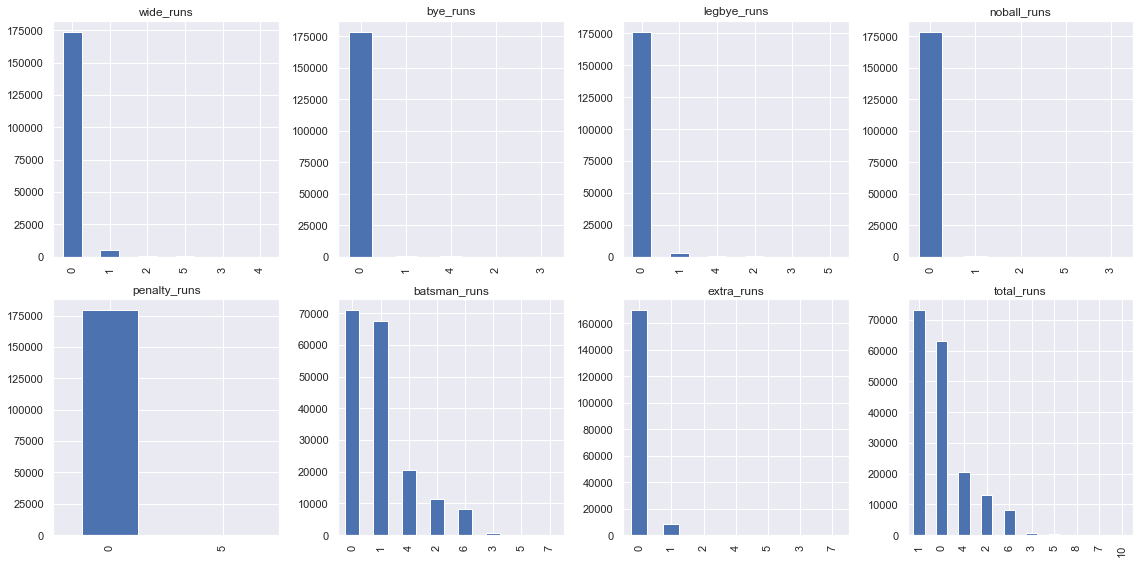

In [23]:
# LET'S FIRST SEE THE OVERALL DISTRIBUTION OF RUNS SCORED 

runs_cols =['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']

fig, axes  = plt.subplots(2,4, figsize=(16,8))
i=0
for col in runs_cols:
    df_deliveries[col].value_counts().plot.bar(ax=axes.flat[i])
    axes.flat[i].set_title(col)
    i=i+1
plt.tight_layout()
plt.show()

In [24]:
print('Total no of fours scored =',df_deliveries.batsman_runs.value_counts()[4])
print('Total no of sixes scored =',df_deliveries.batsman_runs.value_counts()[6])

Total no of fours scored = 20392
Total no of sixes scored = 8170


In [25]:
# DISTRIBUTION OF RUNS SCORED BY MATCH 

runs_by_match = df_deliveries.groupby('match_id')['batsman_runs'].value_counts()
runs_by_match.index.rename(['match_id', 'runs'], inplace=True)

runs_by_match = runs_by_match.to_frame().unstack()
runs_by_match = runs_by_match.fillna(0).astype('int',errors='ignore')

runs_by_match.columns.rename('count', level=0, inplace=True)
runs_by_match

count    batsman_runs                          
runs                0    1   2  3   4  5   6  7
match_id                                       
1                  81  101  16  1  32  0  17  0
2                  81  104  14  0  30  1  17  0
3                  68   84  14  0  38  0  14  0
4                  87  117   5  0  22  0  16  0
5                 108   90  12  2  24  0  12  0
6                  69   99  18  0  23  0   7  0
7                  99   92  18  1  29  0  15  0
8                  84   83   7  1  17  0  20  0
9                  86   84  18  0  24  0  14  0
10                 98   86  10  2  34  0   9  0
11                 96   82   7  0  38  0  11  0
12                 98  101  17  2  14  0  11  0
13                 88   85  15  0  35  0  13  0
14                102   94  12  1  29  0  12  0
15                 91  101  14  0  34  0   8  0
16                 84  111  17  1  23  1  14  0
17                105  101  10  1  24  0   9  0
18                 78  112  13  1  32  0   9  0
19                107   84  21  4  22  0  11  0
20                 86   91  18  0  29  0  25  0
21                 69  114  16  0  33  0  13  0
22                 69   91  11  0  30  0  24  0
23                 67   98  11  1  43  0  12  0
24                121   87  14  1  23  0   6  0
25                 80  104  15  0  33  0  13  0
26                 80  102  19  0  33  0  11  0
27                102   49   8  0  22  0   2  0
28                 95   92  16  1  33  0   8  0
29                 74  102  17  0  33  0  13  0
30                 93   77   9  0  22  0  11  0
31                 71   96  12  0  34  0   8  0
32                 69  100  19  0  44  0  11  0
33                105   96  18  1  20  0   5  0
34                112   95  16  0  30  0  10  0
35                 91   45   5  1  10  0   5  0
36                 79   95  28  2  29  0  14  0
37                 83  106  18  0  27  0  11  0
38                 97   86  21  0  27  0  13  0
39                 76   98  14  0  37  1  14  0
40                104   86   5  0  27  0  16  0
41                 78   79  22  0  24  0  31  0
42                110   88  15  0  21  0   6  0
43                100   93  26  0  16  0  11  0
44                 97   70   8  2  20  0  14  0
45                 76   82  19  0  23  0  16  0
46                 58  115  26  1  31  0  13  0
47                 94   92  22  2  23  0   5  0
48                 91  100  21  0  27  0   9  0
49                 82   86  14  0  51  0  10  0
50                 79   94  19  1  36  0  26  0
51                100   90  18  2  27  0  12  0
52                 84   86  14  0  38  0   6  0
53                108   87   9  1  33  0  12  0
54                 83   65   9  0  10  0   4  0
55                100  102  10  0  24  0  13  0
56                102  104  15  0  16  0  15  0
57                 70   63   5  0  11  0   8  0
58                 99   72  10  1  21  0   4  0
59                111   98  13  2  17  0   7  0
60                110   66  14  0  18  0  17  0
61                 72   98  15  0  38  0  25  0
62                 97   80   6  0  32  0   4  0
63                 94   99   9  0  33  0  11  0
64                147   67   4  0  11  1  10  0
65                114   63  14  1  35  0  14  0
66                 92   60  14  0  27  0  12  0
67                 92   93  11  1  43  1  14  0
68                 82   91   9  1  42  0  23  0
69                120   76  13  1  30  1   9  0
70                116   66   4  0  34  0   9  0
71                100   81  17  0  26  0   9  0
72                 86   63   8  2  27  0  16  0
73                102   88  14  2  37  0   5  0
74                 89  100  12  2  31  0  13  0
75                121   81   4  0  32  0   5  0
76                 73  106  15  0  37  0  12  0
77                 82   95  15  2  40  0   5  0
78                 93   96  18  1  30  0  11  0
79                 89   89  22  1  33  0  10  0
80                 99   86   7  0  34  0  14  0
81              

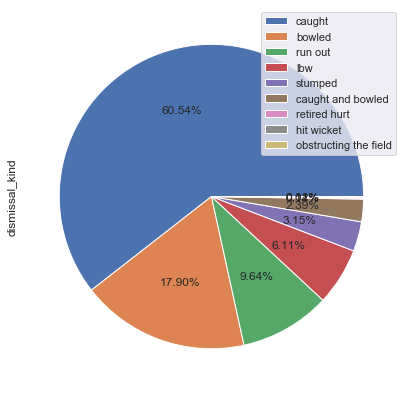

In [26]:
# DISTRIBUTION OF WICKETS

df_deliveries['dismissal_kind'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=None, figsize=(15,7))
plt.legend(labels=df_deliveries['dismissal_kind'].value_counts().index, loc='best')
plt.show()

## Which are the teams who performed best?

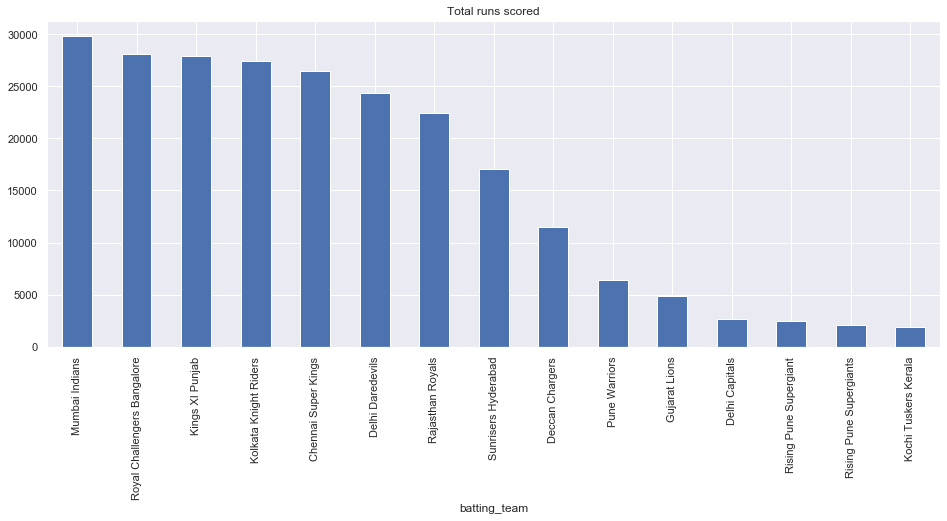

In [27]:
# HIGHEST OVERALL RUNS SCORED BY TEAMS

runs_by_team = df_deliveries.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
runs_by_team.plot(kind='bar', figsize=(16,6))
plt.title('Total runs scored')
plt.show()

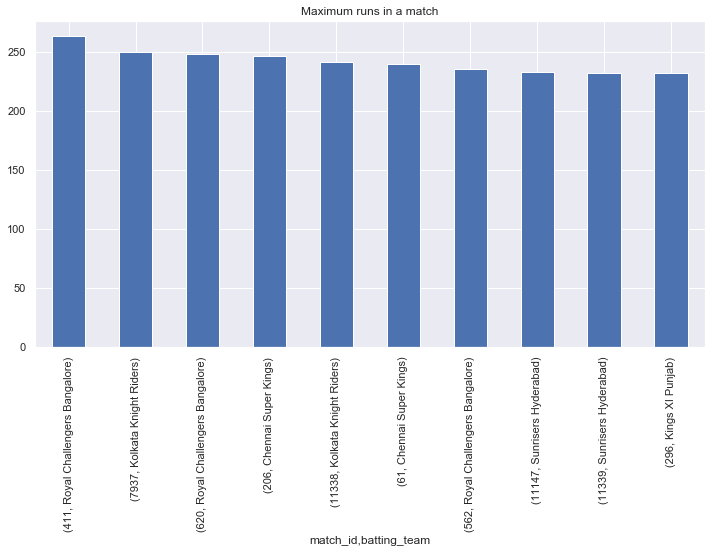

In [28]:
# HIGHEST RUNS SCORED BY A TEAM IN A SINGLE MATCH

runs_by_team = df_deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().sort_values(ascending=False)

runs_by_team[:10].plot(kind='bar', figsize=(12,6))
plt.title('Maximum runs in a match')
plt.show()

## Who were the best batsmen?

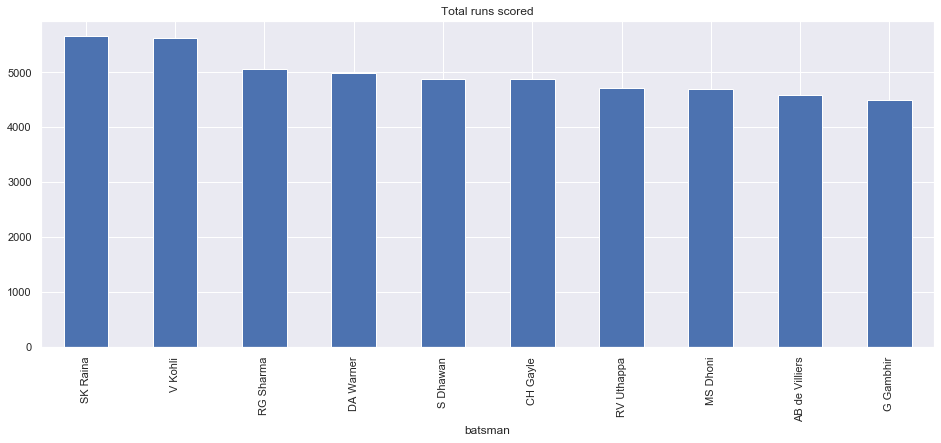

In [29]:
# TOP 10 BATSMEN SCORING MAXIMUM NO OF RUNS

runs_by_batsmen = df_deliveries.groupby('batsman')['total_runs'].sum().sort_values(ascending=False)
runs_by_batsmen[:10].plot(kind='bar', figsize=(16,6))
plt.title('Total runs scored')
plt.show()

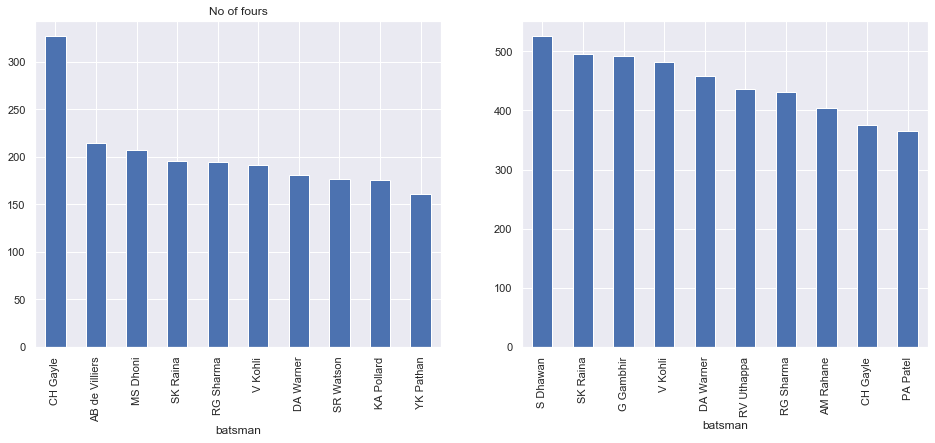

In [30]:
# BATSMEN SCORING MAXIMUM NO OF FOURS

runs_by_batsmen = df_deliveries.groupby('batsman')['batsman_runs'].value_counts()

fig, axes = plt.subplots(1,2,figsize=(16,6))
runs_by_batsmen = runs_by_batsmen.unstack()
runs_by_batsmen = runs_by_batsmen.fillna(0).astype('int',errors='ignore')
runs_by_batsmen.sort_values(by=6, ascending=False)[6][:10].plot(kind='bar', ax=axes.flat[0])
runs_by_batsmen.sort_values(by=4, ascending=False)[4][:10].plot(kind='bar', ax=axes.flat[1])
axes.flat[0].set_title('No of sixes'); axes.flat[0].set_title('No of fours')
plt.show()

In [31]:
# RUNS SCORED BY BATSMEN IN EACH MATCH

runs_by_match_batsman = df_deliveries.groupby(['match_id','batsman'])['batsman_runs'].value_counts()
runs_by_match_batsman = runs_by_match_batsman.unstack()
runs_by_match_batsman = runs_by_match_batsman.fillna(0).astype('int',errors='ignore')
runs_by_match_batsman['total'] = runs_by_match_batsman.sum(axis=1)
runs_by_match_batsman

batsman_runs                    0   1   2  3   4  5   6  7  total
match_id batsman                                                 
1        A Choudhary            1   0   0  0   0  0   1  0      2
         BCJ Cutting            1   2   1  0   0  0   2  0      6
         CH Gayle              13   4   1  0   2  0   3  0     23
         DA Warner              6   0   0  0   2  0   1  0      9
         DJ Hooda               2   8   1  0   0  0   1  0     12
         KM Jadhav              4   9   0  0   4  0   1  0     18
         MC Henriques           9  19   3  1   3  0   2  0     37
         Mandeep Singh          8   2   1  0   5  0   0  0     16
         S Aravind              2   0   0  0   0  0   0  0      2
         S Dhawan               7  18   1  0   5  0   0  0     31
         SR Watson              5   8   2  0   1  0   1  0     17
         STR Binny              4   5   0  0   0  0   1  0     10
         Sachin Baby            2   1   0  0   0  0   0  0      3
         TM Head                4  12   3  0   3  0   0  0     22
         TS Mills               2   0   0  0   0  0   1  0      3
         YS Chahal              4   3   0  0   0  0   0  0      7
         Yuvraj Singh           7  10   3  0   7  0   3  0     30
2        AM Rahane              8  16   1  0   6  0   3  0     34
         AT Rayudu              3   8   1  0   0  0   0  0     12
         BA Stokes              4   7   1  0   3  0   0  0     15
         HH Pandya              5   7   0  0   1  0   4  0     17
         JC Buttler            10   1   1  0   3  1   3  0     19
         KA Pollard             4   9   0  0   3  0   1  0     17
         KH Pandya              3   3   0  0   0  0   0  0      6
         MA Agarwal             3   2   0  0   1  0   0  0      6
         MS Dhoni               3   8   0  0   1  0   0  0     12
         N Rana                10  14   2  0   1  0   2  0     29
         PA Patel               8   3   0  0   4  0   0  0     15
         RG Sharma              4   3   0  0   0  0   0  0      7
         SPD Smith             15  22   8  0   7  0   3  0     55
         TG Southee             1   1   0  0   0  0   1  0      3
3        AJ Finch               3   3   0  0   0  0   2  0      8
         BB McCullum           12   5   1  0   4  0   2  0     24
         CA Lynn               14  15   3  0   6  0   8  0     46
         G Gambhir             15  18   5  0  12  0   0  0     50
         JJ Roy                 8   2   0  0   3  0   0  0     13
         KD Karthik             6  11   0  0   6  0   2  0     25
         SK Raina              10  30   5  0   7  0   0  0     52
4        AM Rahane              4   9   0  0   1  0   1  0     15
         AR Patel              10  12   1  0   1  0   1  0     25
         BA Stokes              6  22   1  0   2  0   3  0     34
         DA Miller             12  10   2  0   1  0   2  0     27
         DT Christian           2   3   0  0   2  0   1  0      8
         GJ Maxwell             8   8   0  0   3  0   4  0     23
         HM Amla               10  14   0  0   2  0   1  0     27
         M Vohra                5   4   0  0   1  0   1  0     11
         MA Agarwal             4   0   0  0   0  0   0  0      4
         MK Tiwary              2  16   0  0   3  0   2  0     23
         MS Dhoni               8   5   0  0   0  0   0  0     13
         SPD Smith             12  12   1  0   3  0   0  0     28
         WP Saha                4   2   0  0   3  0   0  0      9
5        A Mishra               7   6   1  0   0  0   0  0     14
         AP Tare               10   4   1  0   3  0   0  0     18
         CH Gayle               6   2   0  0   1  0   0  0      9
         CH Morris              1   4   0  0   0  0   0  0      5
         CR Brathwaite          4   1   0  0   0  0   0  0      5
         Iqbal Abdulla          3   3   1  0   0  0   0  0      7
         KK Nair                2   0   0  0   1  0   0  0      3
         KM Jadhav             12  13   

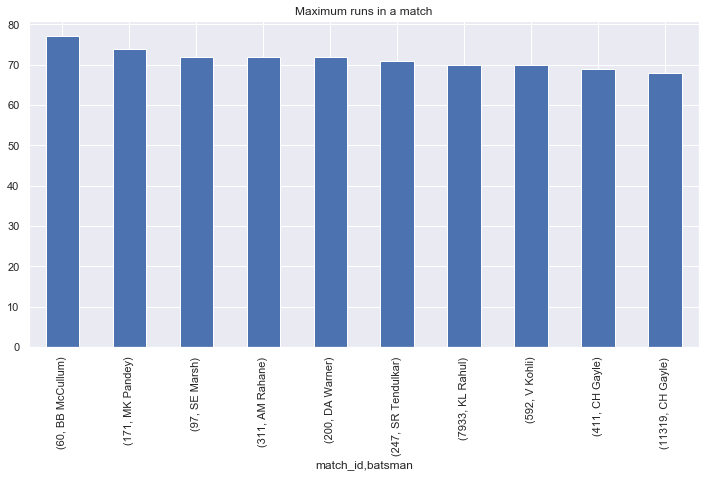

In [32]:
# MAXIMUM RUNS SCORED BY A BATSMAN IN A SINGLE MATCH

runs_sorted = runs_by_match_batsman.sort_values(by='total', ascending=False)
idx = runs_sorted.groupby(['match_id'])['total'].transform(max) == runs_sorted['total']
max_runs = runs_sorted[idx]
max_runs
max_runs['total'][:10].plot(kind='bar', figsize=(12,6))
plt.title('Maximum runs in a match')
plt.show()

## Who were the best bowlers and fielders?

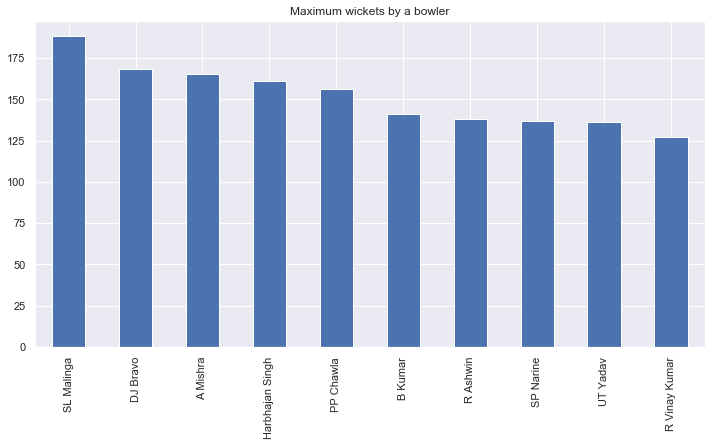

In [33]:
# TOP 10 BOWLERS WITH MAXIMUM NO OF WICKETS

wickets_by_bowler = df_deliveries[~(df_deliveries['player_dismissed'].isnull())]['bowler'].value_counts()
wickets_by_bowler.sort_values(ascending=False)[:10].plot(kind='bar', figsize=(12,6))

plt.title('Maximum wickets by a bowler')
plt.show()

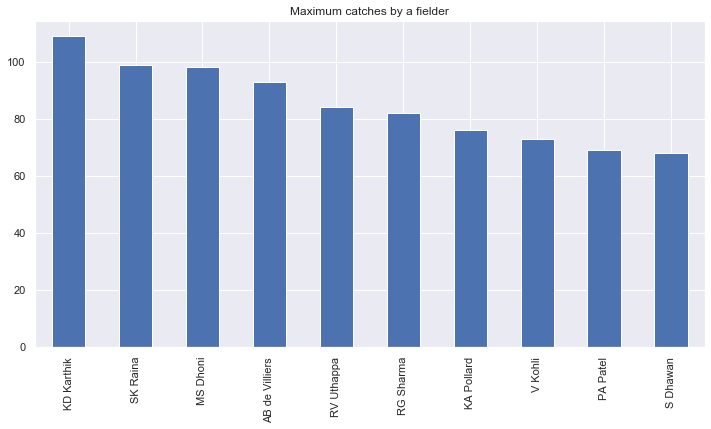

In [34]:
# TOP 10 FIELDERS WITH MAXIMUM NO OF CATCHES

catches_by_fielder = df_deliveries[(df_deliveries['player_dismissed'] != np.nan)&(df_deliveries['dismissal_kind'] == 'caught')]['fielder'].value_counts()
catches_by_fielder.sort_values(ascending=False)[:10].plot(kind='bar', figsize=(12,6))

plt.title('Maximum catches by a fielder')
plt.show()

## THANK YOU !